# UNIFORM DISTRIBUTION

\
f(x) = \begin{cases}
\frac{1}{b - a} & \text{if } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}



In [9]:
import matplotlib.pyplot as plt
# from IPython.display import Math, Latex
# from IPython.core.display import Image
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})

In [10]:
from scipy.stats import uniform
number = 10000
start = 20
width = 25

In [11]:
uniform_data = uniform.rvs(size=number, loc=start, scale=width)

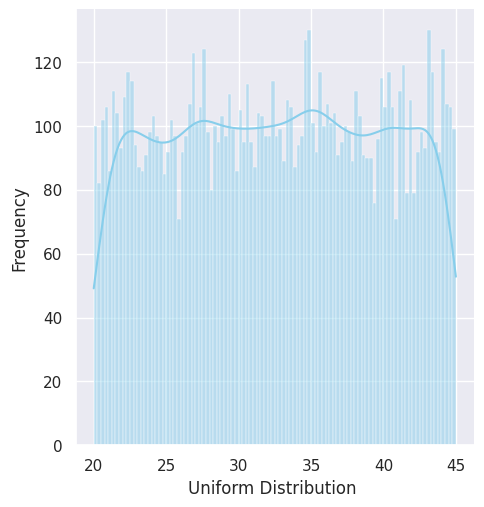

In [13]:
axis = sns.displot(uniform_data, bins=100, kde=True, color='skyblue')
axis.set(xlabel='Uniform Distribution ', ylabel='Frequency')

# NORMAL DISTRIBUTION

In [15]:
from scipy.stats import norm

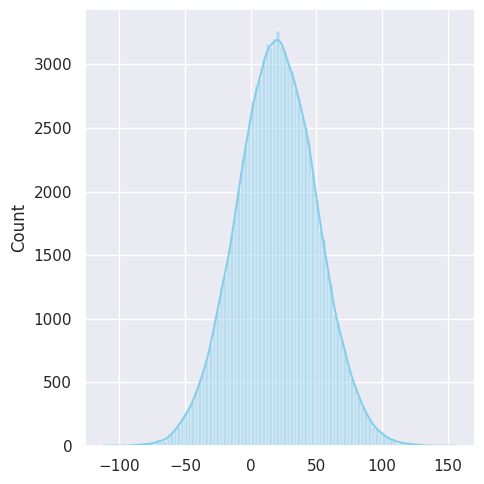

In [24]:
normal_data = norm.rvs(size=90000,loc=20,scale=30)
axis = sns.displot(normal_data, bins=100, kde=True,color='skyblue')

# EXPONENTIAL DISTRIBUTION

In [25]:
from scipy.stats import expon

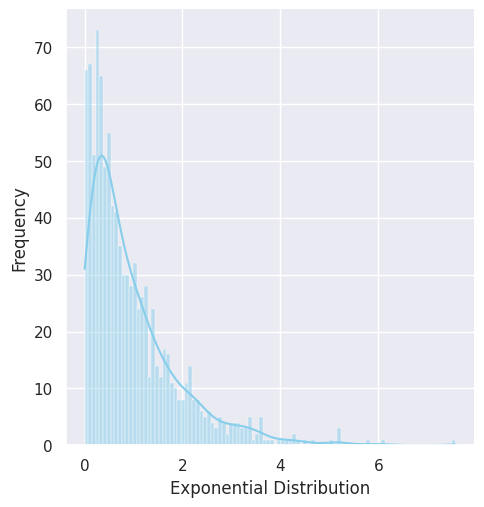

In [28]:
expon_data = expon.rvs(scale=1,loc=0,size=1000)
axis = sns.displot(expon_data, kde=True, bins=100, color='skyblue')
axis.set(xlabel='Exponential Distribution', ylabel='Frequency')

# BINOMIAL DISTRIBUTION

In [31]:
from scipy.stats import binom

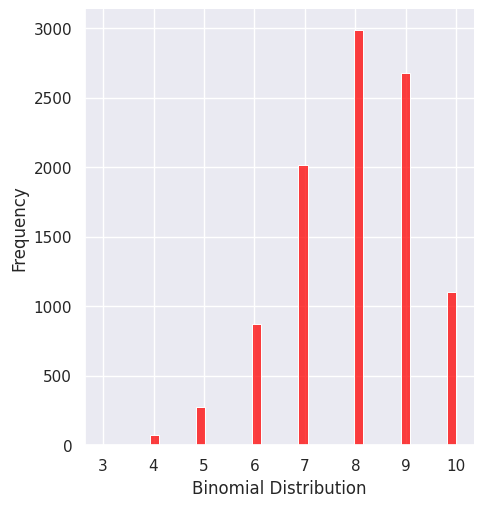

In [30]:
binomial_data = binom.rvs(n=10, p=0.8,size=10000)
axis = sns.displot(binomial_data, kde=False, color='red')
axis.set(xlabel='Binomial Distribution', ylabel='Frequency')

In [34]:
binomial_data.max(),binomial_data.min()

(10, 3)

## Descriptive statistics
**Descriptive statistics** deals with the formulation of simple summaries of data so that they
can be clearly understood. The summaries of data may be either numerical representations
or visualizations with simple graphs for further understanding. Typically, such summaries
help in the initial phase of statistical analysis. There are two types of descriptive statistics:

**1.Measures of central tendency**

**2. Measures of variability (spread)**

Measures of central tendency include mean, median, and mode, while measures of
variability include standard deviation (or variance), the minimum and maximum
values of the variables, kurtosis, and skewness.

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/hands-on-exploratory-data-analysis-with-python/master/Chapter%205/data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [42]:
df['price'].str.isnumeric().value_counts()

price
True     201
False      4
Name: count, dtype: int64

In [44]:
df['price'].str.isnumeric().value_counts()

# List out the values which are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]

#Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)

df[df['normalized-losses']=='?'].count()
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmean=nl.astype(str).astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()
df['bore'].loc[df['bore'] == '?']
# Replace the non-numeric value to null and convert the datatype
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce')

df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')
df['num-of-doors'].loc[df['num-of-doors'] == '?']
df= df[df['num-of-doors'] != '?']
df['num-of-doors'].loc[df['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [45]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,199.000000,199.000000,203.000000,203.000000,201.000000,203.000000,203.000000,203.000000
mean,0.837438,130.147783,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,3.330955,3.254070,10.093202,104.463054,5125.870647,25.172414,30.699507,13241.911330
std,1.250021,35.956490,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,0.274054,0.318023,3.888216,39.612384,479.820136,6.529812,6.874645,7898.957924
min,-2.000000,65.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7781.500000
50%,1.000000,128.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,164.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [50]:
df['horsepower'].skew()

1.3912243809599363